In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import json
from config import api_key

In [85]:
#setting up API url to get the price

url = "http://api.eia.gov/series/?api_key="

elect_qua_price_df = pd.DataFrame(columns = ["State","2020 price","2019 price","2018 price","2017 price","2016 price","2015 price","2014 price","2013 price","2012 price","2011 price","2010 price"])
elect_qua_sales_df = pd.DataFrame(columns = ["State","2020 so far sales","2019 sales","2018 sales","2017 sales","2016 sales","2015 sales","2014 sales","2013 sales","2012 sales","2011 sales","2010 sales"])
states = ["AL","AK","AZ", "AR","CA","CO","CT", "DE","FL","GA", "HI", "ID", "IL","IN", "IA","KS", "KY","LA","ME","MD",
          "MA","MI","MN", "MS","MO","MT", "NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD",
          "TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#looping through the call to get information calling API calling for price
for states in states:
    elec_df_q = requests.get(url+ api_key +"&series_id=ELEC.PRICE."+states+"-ALL.Q").json()
    Q1 = elec_df_q['series'][0]['data'][1][1]
    Q2 = elec_df_q['series'][0]['data'][0][1]
    elec_df_y = requests.get(url+ api_key +"&series_id=ELEC.PRICE."+states+"-ALL.A").json()
    yr_2020 = round((Q1+Q2)/2,2)
    new_row_df = {"State": states,"2020 price":yr_2020 ,
               "2019 price":elec_df_y['series'][0]['data'][0][1],
               "2018 price":elec_df_y['series'][0]['data'][1][1],
               "2017 price":elec_df_y['series'][0]['data'][2][1],
               "2016 price":elec_df_y['series'][0]['data'][3][1],
               "2015 price":elec_df_y['series'][0]['data'][4][1],
               "2014 price":elec_df_y['series'][0]['data'][5][1],
               "2013 price":elec_df_y['series'][0]['data'][6][1],
               "2012 price":elec_df_y['series'][0]['data'][7][1],
               "2011 price":elec_df_y['series'][0]['data'][8][1],
               "2010 price":elec_df_y['series'][0]['data'][9][1]
                 }
    elect_qua_price_df = elect_qua_price_df.append(new_row_df, ignore_index=True)
    elec_df_new = requests.get(url+ api_key +"&series_id=ELEC.SALES."+states+"-ALL.Q").json()
    Q1_s = elec_df_new['series'][0]['data'][1][1]
    Q2_s = elec_df_new['series'][0]['data'][0][1]
    elec_df_y_s = requests.get(url+ api_key +"&series_id=ELEC.SALES."+states+"-ALL.A").json()
    yr_2020_s = (Q2_s+Q1_s)
    new_row_df = {"State": states,"2020 so far sales":yr_2020_s ,
               "2019 sales":elec_df_y_s['series'][0]['data'][0][1],
               "2018 sales":elec_df_y_s['series'][0]['data'][1][1],
               "2017 sales":elec_df_y_s['series'][0]['data'][2][1],
               "2016 sales":elec_df_y_s['series'][0]['data'][3][1],
               "2015 sales":elec_df_y_s['series'][0]['data'][4][1],
               "2014 sales":elec_df_y_s['series'][0]['data'][5][1],
               "2013 sales":elec_df_y_s['series'][0]['data'][6][1],
               "2012 sales":elec_df_y_s['series'][0]['data'][7][1],
               "2011 sales":elec_df_y_s['series'][0]['data'][8][1],
               "2010 sales":elec_df_y_s['series'][0]['data'][9][1]
                 }
    elect_qua_sales_df = elect_qua_sales_df.append(new_row_df, ignore_index=True)


elect_qua_price_df.head(25)


,State,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price,2014 price,2013 price,2012 price,2011 price,2010 price
0,AL,9.73,9.88,9.63,9.83,9.56,9.33,9.27,9.02,9.18,9.10,8.89
1,AK,20.15,20.43,19.36,19.10,17.93,17.59,17.46,16.49,16.33,16.08,14.76
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34,10.18,10.14,9.81,9.71,9.69
3,AR,8.09,8.13,7.78,8.26,8.13,8.19,7.90,7.93,7.62,7.43,7.28
4,CA,17.03,17.04,16.58,16.06,15.23,15.42,15.15,14.30,13.53,13.05,13.01
5,CO,9.93,10.02,10.02,9.99,9.83,9.94,10.06,9.88,9.39,9.39,9.15
6,CT,19.51,18.75,18.41,17.55,17.24,17.77,17.05,15.66,15.54,16.35,17.38
7,DE,10.62,10.64,10.55,10.90,11.09,11.17,11.22,10.90,11.06,11.48,11.97
8,FL,10.12,10.70,10.32,10.42,9.91,10.49,10.77,10.22,10.44,10.61,10.58
9,GA,9.51,9.53,9.62,9.83,9.59,9.62,10.03,9.69,9.37,9.61,8.87


In [86]:
elect_qua_sales_df.head(25)

,State,2020 so far sales,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales,2014 sales,2013 sales,2012 sales,2011 sales,2010 sales
0,AL,39555.42529,87734.82971,90280.45601,86241.73002,88225.14099,88845.54301,90493.72702,87852.10702,86182.54801,88995.36900,90862.64502
1,AK,3004.94888,5840.97456,5972.46697,6185.79900,6123.20203,6159.20400,6164.81201,6268.21201,6416.41098,6319.53996,6247.03804
2,AZ,36209.02713,77720.38750,78346.30198,77646.26201,78237.82802,77349.41596,76297.68498,75662.03703,75063.34301,74943.64501,72833.03001
3,AR,21469.48132,47916.95892,49602.70799,46085.95101,46188.43801,46465.15401,47080.30100,46683.03401,46859.56700,47927.82902,48194.28501
4,CA,112830.38146,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698,262584.78604,261332.45899,259538.03803,261941.70002,258530.89202
5,CO,26800.34199,56271.64572,56450.48002,54830.18600,54802.03701,54116.04599,53396.52104,53441.64901,53685.29703,53458.28503,52917.78601
6,CT,12831.14497,27754.65181,28833.92499,28135.52999,28931.08701,29476.15502,29354.46001,29824.51602,29492.33802,29858.99301,30391.76599
7,DE,5165.81757,11236.91617,11773.09999,11128.60301,11258.43802,11498.20500,11338.47699,11347.85600,11519.33103,11483.29598,11605.93201
8,FL,110212.47264,237728.48947,238565.39101,233154.54901,235721.82202,235599.39799,226078.11100,221919.51399,220674.33303,225090.42199,231209.61398
9,GA,62055.90270,138087.81610,139866.07398,133456.62002,138112.23899,135878.21498,135789.93199,130497.47001,130978.87203,136371.14900,140671.57998


In [92]:
elec_sales_price_df = pd.merge(elect_qua_price_df, elect_qua_sales_df, on = ['State'], how = 'outer')

elec_sales_price_df.head()

,State,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price,2014 price,2013 price,2012 price,...,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales,2014 sales,2013 sales,2012 sales,2011 sales,2010 sales
0,AL,9.73,9.88,9.63,9.83,9.56,9.33,9.27,9.02,9.18,...,87734.82971,90280.45601,86241.73002,88225.14099,88845.54301,90493.72702,87852.10702,86182.54801,88995.36900,90862.64502
1,AK,20.15,20.43,19.36,19.10,17.93,17.59,17.46,16.49,16.33,...,5840.97456,5972.46697,6185.79900,6123.20203,6159.20400,6164.81201,6268.21201,6416.41098,6319.53996,6247.03804
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34,10.18,10.14,9.81,...,77720.38750,78346.30198,77646.26201,78237.82802,77349.41596,76297.68498,75662.03703,75063.34301,74943.64501,72833.03001
3,AR,8.09,8.13,7.78,8.26,8.13,8.19,7.90,7.93,7.62,...,47916.95892,49602.70799,46085.95101,46188.43801,46465.15401,47080.30100,46683.03401,46859.56700,47927.82902,48194.28501
4,CA,17.03,17.04,16.58,16.06,15.23,15.42,15.15,14.30,13.53,...,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698,262584.78604,261332.45899,259538.03803,261941.70002,258530.89202


In [67]:
path_to_file = os.path.join("..", "Project_1", "data","CostOfLiving.csv")
cost_df = pd.read_csv(path_to_file)
cost_df.head(51)


,State,costIndex,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,Mississippi,86.1,1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,2,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,3,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,4,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,6,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,7,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,8,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,9,96.9,73.8,92.4,97.6,98.5
9,Wyoming,89.3,10,98.7,72.3,87.3,99.3,94.9


In [68]:
state_group = cost_df.groupby('State')
state_price = state_group['costIndex'].mean()
state_price

State
Alabama            89.3
Alaska            129.9
Arizona            97.0
Arkansas           86.9
California        151.7
Colorado          105.6
Connecticut       127.7
Delaware          108.1
Florida            97.9
Georgia            89.2
Hawaii            192.9
Idaho              92.3
Illinois           94.5
Indiana            90.0
Iowa               90.1
Kansas             89.0
Kentucky           90.9
Louisiana          93.9
Maine             117.5
Maryland          129.7
Massachusetts     131.6
Michigan           88.9
Minnesota         101.6
Mississippi        86.1
Missouri           87.1
Montana           106.9
Nebraska           90.8
Nevada            108.5
New Hampshire     109.7
New Jersey        125.1
New Mexico         87.5
New York          139.1
North Carolina     94.9
North Dakota       98.8
Ohio               90.8
Oklahoma           87.0
Oregon            134.2
Pennsylvania      101.7
Rhode Island      119.4
South Carolina     95.9
South Dakota       99.8
Tennessee 

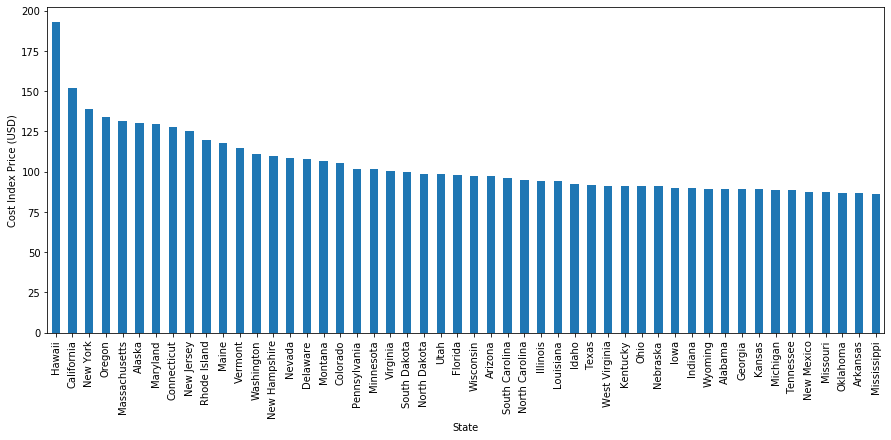

In [69]:
plt.figure(figsize=(15,6))
state_price = state_price.sort_values(ascending=False)
cost_chart = state_price.plot(kind='bar')
cost_chart.set_xlabel("State")
cost_chart.set_ylabel("Cost Index Price (USD)")

plt.show()

In [71]:
taxes_path = os.path.join( "data","State_Local_Sales_Taxes_2020_July_2.csv")
State_Taxes = pd.read_csv(taxes_path, encoding='latin1')
State_Taxes.head()


,State w/ Notes,State,Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate
0,Ala.,Alabama,AL,0.0400,40.0,0.0522,0.0922,5.0,0.07500
1,Alaska,Alaska,AK,0.0000,46.0,0.0176,0.0176,46.0,0.07500
2,Ariz.,Arizona,AZ,0.0560,28.0,0.0280,0.0840,11.0,0.05600
3,Ark.,Arkansas,AR,0.0650,9.0,0.0303,0.0953,2.0,0.05125
4,Calif. (b),California,CA,0.0725,1.0,0.0143,0.0868,8.0,0.02500


In [72]:
pop_path = os.path.join("data","pop_density.csv")
State_Pop = pd.read_csv(pop_path, encoding='latin1')
State_Pop.head()

,STATE_OR_REGION,Abbreviation,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,US,92228531.0,106021568.0,123202660.0,132165129.0,151325798.0,179323175.0,203211926.0,226545805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,AK,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,AZ,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,AR,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0


In [73]:
State_Taxes = State_Taxes.drop(['State w/ Notes'], axis=1)
State_Taxes.head(51)

,State,Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500


In [74]:
State_Pop = State_Pop.rename({'STATE_OR_REGION': 'State'}, axis='columns')
State_Pop.head(50)

,State,Abbreviation,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,US,92228531.0,106021568.0,123202660.0,132165129.0,151325798.0,179323175.0,203211926.0,226545805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,AK,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,AZ,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,AR,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
5,California,CA,2377549.0,3426861.0,5677251.0,6907387.0,10586223.0,15717204.0,19953134.0,23667902.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
6,Colorado,CO,799024.0,939629.0,1035791.0,1123296.0,1325089.0,1753947.0,2207259.0,2889964.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
7,Connecticut,CT,1114756.0,1380631.0,1606903.0,1709242.0,2007280.0,2535234.0,3031709.0,3107576.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
8,Delaware,DE,202322.0,223003.0,238380.0,266505.0,318085.0,446292.0,548104.0,594338.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
9,District of Columbia,DC,331069.0,437571.0,486869.0,663091.0,802178.0,763956.0,756510.0,638333.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
Pop_Taxes = pd.merge(State_Taxes, State_Pop, on = ['State'], how = 'outer')

Pop_Taxes.head(50)

,State,Abbreviation_x,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500,AL,2138093.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500,AK,64356.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600,AZ,204354.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125,AR,1574449.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300,CO,799024.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000,DC,331069.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500,FL,752619.0,...,38.0,35.0,33.0,29.0,19.0,16.0,13.0,12.0,10.0,10.0


In [87]:
Pop_Taxes = Pop_Taxes.rename({'Abbreviation_x': 'State Abbreviation'}, axis='columns')
Pop_Taxes.head(51)

,State,State Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500,AL,2138093.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500,AK,64356.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600,AZ,204354.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125,AR,1574449.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300,CO,799024.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000,DC,331069.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500,FL,752619.0,...,38.0,35.0,33.0,29.0,19.0,16.0,13.0,12.0,10.0,10.0


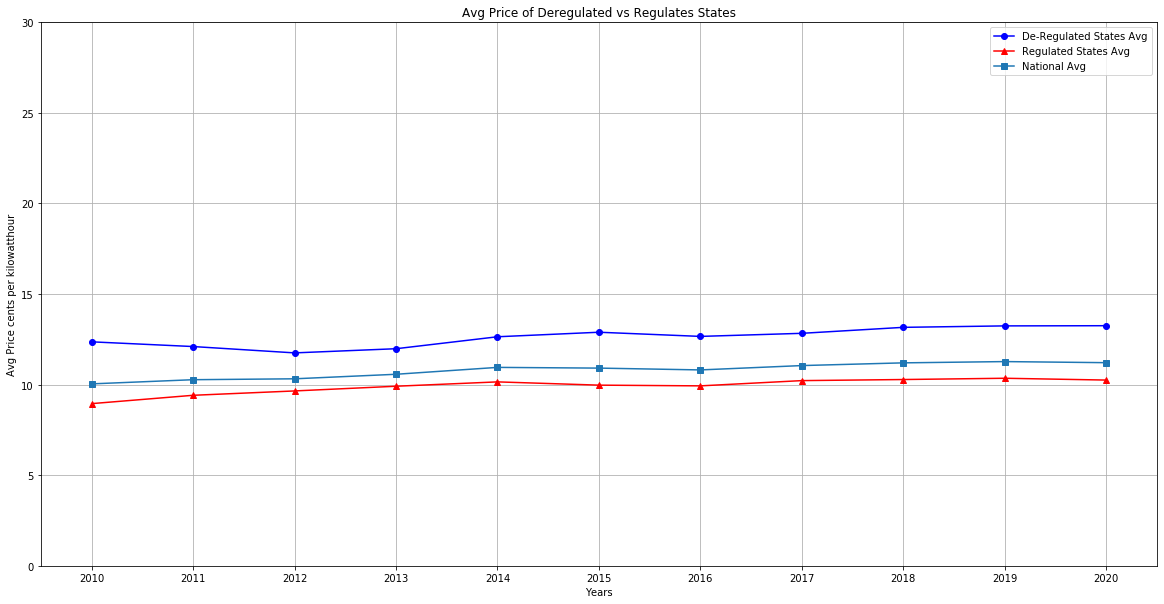

In [155]:
#Doing the visualization of regulated states vs unregulated price vs year
#grouping and averaging out the regulated vs deregulated states

#List of de-regulated: California, Connecticut, Delaware, Illinois, Massachusetts, Maryland, Maine, Michigan, Montana, New Hampshire, New Jersey, New York, Ohio, Pennsylvania, Rhode Island, and Texas. 
#List of regulated: Alabama, Alaska, Hawaii, Idaho, Mississippi, Minnesota, North Carolina, Wisconsin (All other states)

de_reg_states = elect_qua_price_df.loc[elect_qua_price_df['State'].isin(['CA', 'CT', 'DE', 'IL', 'MA', 'MD', 'ME', 'MI', 'MT', 'NH', 'NJ', 'NY', 'OH', 'PA', 'RI', 'TX'])]

reg_states = elect_qua_price_df.loc[elect_qua_price_df['State'].isin(['AL','AK','AZ','AR','CO','FL','GA','HI','ID','IN','IN','IA','KS','KY','LA','MN','MS','MO','NE','NV','NM','NC','ND','OK','OR','SC','SD','TN','UT','VT','VA','WA','WV','WI','WY'])]

#creating df to display
AVG_PR_DF = pd.DataFrame(columns = ["Year","De-Regulated States Avg","Regulated States Avg","National Avg"])

# populating DF to get avg per categories
yr2010_row_df = {"Year":"2010",
                 "De-Regulated States Avg":round(de_reg_states['2010 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2010 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2010 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2010_row_df, ignore_index=True)

yr2011_row_df = {"Year":"2011",
                 "De-Regulated States Avg":round(de_reg_states['2011 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2011 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2011 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2011_row_df, ignore_index=True)

yr2012_row_df = {"Year":"2012",
                 "De-Regulated States Avg":round(de_reg_states['2012 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2012 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2012 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2012_row_df, ignore_index=True)


yr2013_row_df = {"Year":"2013",
                 "De-Regulated States Avg":round(de_reg_states['2013 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2013 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2013 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2013_row_df, ignore_index=True)

yr2014_row_df = {"Year":"2014",
                 "De-Regulated States Avg":round(de_reg_states['2014 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2014 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2014 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2014_row_df, ignore_index=True)


yr2015_row_df = {"Year":"2015",
                 "De-Regulated States Avg":round(de_reg_states['2015 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2015 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2015 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2015_row_df, ignore_index=True)


yr2016_row_df = {"Year":"2016",
                 "De-Regulated States Avg":round(de_reg_states['2016 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2016 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2016 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2016_row_df, ignore_index=True)



yr2017_row_df = {"Year":"2017",
                 "De-Regulated States Avg":round(de_reg_states['2017 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2017 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2017 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2017_row_df, ignore_index=True)

yr2018_row_df = {"Year":"2018",
                 "De-Regulated States Avg":round(de_reg_states['2018 price'].mean(),2),
                 "Regulated States Avg":round(reg_states['2018 price'].mean(),2),
                 "National Avg":round(elect_qua_price_df['2018 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2018_row_df, ignore_index=True)


yr2019_row_df = {"Year":"2019","De-Regulated States Avg":round(de_reg_states['2019 price'].mean(),2),"Regulated States Avg":round(reg_states['2019 price'].mean(),2),"National Avg":round(elect_qua_price_df['2019 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2019_row_df, ignore_index=True)


yr2020_row_df = {"Year":"2020","De-Regulated States Avg":round(de_reg_states['2020 price'].mean(),2),"Regulated States Avg":round(reg_states['2020 price'].mean(),2),"National Avg":round(elect_qua_price_df['2020 price'].mean(),2)}
AVG_PR_DF = AVG_PR_DF.append(yr2020_row_df, ignore_index=True)

#plotting
plt.figure(figsize=(20,10))
plt.plot(AVG_PR_DF['Year'],AVG_PR_DF['De-Regulated States Avg'],marker ='o', color='blue', label="De-Regulated States Avg")
plt.plot(AVG_PR_DF['Year'],AVG_PR_DF['Regulated States Avg'], marker='^', color='red', label="Regulated States Avg")
plt.plot(AVG_PR_DF['Year'],AVG_PR_DF['National Avg'], marker='s', label="National Avg")

#adding labels
plt.legend(labels=["De-Regulated States Avg", "Regulated States Avg","National Avg"], loc="best")
plt.title("Avg Price of Deregulated vs Regulates States")
plt.xlabel("Years")
plt.ylabel("Avg Price cents per kilowatthour")
plt.grid()

#setting limits
plt.ylim(0, 30)


plt.show()
